version 2.0

# Data Analysis using Pandas and Matplotlib

A good source of data sets https://data.gov.ie/ <br>
Met Eireann Historical data available:<br>

https://www.met.ie/climate/available-data/long-term-data-sets

In this lesson we are going to import historical data from Met eireann and analyise it using Panda's and plot the results using Matplotlib.



In [2]:
# import the list of stations
import pandas as pd
# Plot Library
from matplotlib import pyplot as plt
import numpy as np

## Import the CSV and Print Dataframe

In [3]:
# No need for a directory path if in the same directory, index_col = 'Year'
df = pd.read_csv("/Users/morgan/Documents/Courses/Python/MyModules/DublinAirportClean.csv")

In [4]:
#print(df)

In [5]:
df.columns

Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'],
      dtype='object')

In [6]:
df

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1850,75.8,47.8,18.5,97.5,58.6,43.6,66.0,41.2,54.2,40.4,60.0,81.1
1,1851,112.0,26.2,63.1,44.4,29.3,78.5,70.5,55.2,24.6,88.0,27.5,23.5
2,1852,80.3,70.5,18.2,30.4,93.0,162.2,56.0,97.2,78.2,78.7,156.1,97.2
3,1853,74.7,52.3,71.7,44.8,22.7,58.9,49.9,81.3,35.5,123.7,40.3,52.3
4,1854,101.1,15.7,18.4,15.7,69.3,93.6,58.1,29.1,33.1,45.9,76.8,51.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,2006,16.0,38.0,70.0,41.0,117.0,27.0,18.0,58.0,85.0,107.0,69.0,95.0
157,2007,40.0,78.0,39.0,15.0,35.0,126.0,127.0,96.0,39.0,16.0,54.0,64.0
158,2008,97.0,15.0,102.0,28.0,33.0,76.0,111.0,192.4,114.0,93.0,45.0,39.0
159,2009,62.0,56.0,26.0,71.0,76.0,64.0,165.0,70.0,24.0,63.0,171.0,70.0


## Changing the Index

In [7]:
# Make the Year the index value permanently
df.set_index('Year', inplace = True)
#df.reset_index(inplace = True)

In [8]:
df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1850,75.8,47.8,18.5,97.5,58.6,43.6,66.0,41.2,54.2,40.4,60.0,81.1
1851,112.0,26.2,63.1,44.4,29.3,78.5,70.5,55.2,24.6,88.0,27.5,23.5
1852,80.3,70.5,18.2,30.4,93.0,162.2,56.0,97.2,78.2,78.7,156.1,97.2
1853,74.7,52.3,71.7,44.8,22.7,58.9,49.9,81.3,35.5,123.7,40.3,52.3
1854,101.1,15.7,18.4,15.7,69.3,93.6,58.1,29.1,33.1,45.9,76.8,51.2
...,...,...,...,...,...,...,...,...,...,...,...,...
2006,16.0,38.0,70.0,41.0,117.0,27.0,18.0,58.0,85.0,107.0,69.0,95.0
2007,40.0,78.0,39.0,15.0,35.0,126.0,127.0,96.0,39.0,16.0,54.0,64.0
2008,97.0,15.0,102.0,28.0,33.0,76.0,111.0,192.4,114.0,93.0,45.0,39.0


In [9]:
df.loc[2009]
df.loc[2009, 'Mar']

26.0

In [10]:
# Output the year values( )
df.index


Int64Index([1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859,
            ...
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010],
           dtype='int64', name='Year', length=161)

In [11]:
## Using iloc
#df['Jan']
rain_y = df.iloc[5]
print(rain_y)

Jan     11.3
Feb    101.2
Mar     38.6
Apr     12.6
May     42.1
Jun     52.1
Jul     81.2
Aug     65.5
Sep     41.9
Oct    113.8
Nov     43.1
Dec     32.6
Name: 1855, dtype: float64


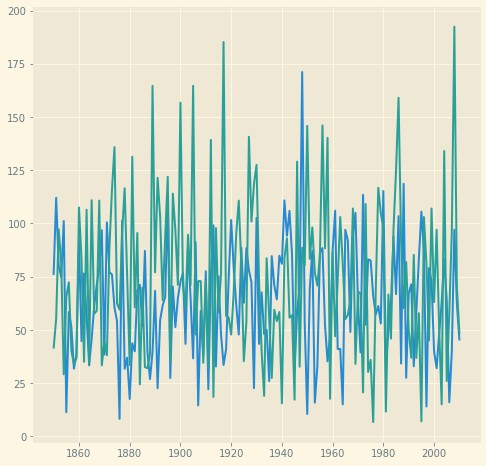

In [12]:
#Simple Plot
plt.rcParams['figure.figsize'] = [8, 8]# set the size of your graph
plt.style.use('Solarize_Light2') # style
plt.plot(df.index,df.Jan)
plt.plot(df.index,df.Aug)

## Apply Lambda Function to Pandas Data Frame
The distance d in inches (″) is equal to the distance d in millimeters (mm) divided by 25.4:

In [13]:
# Mil to inches
def to_inches(x):
    y= x/25.4
    return round(y,2)

In [14]:
print(to_inches(12))

0.47


In [15]:
x= 12
convert_to_inches = lambda x:round(x/25.4,2)
print(convert_to_inches(x))

0.47


In [16]:
# Convert the January figures to inches and append as a column at the end
df['Jan_in'] = df.apply(lambda x: round(x['Jan']/25.4,2), axis=1)
df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Jan_in
Year,,,,,,,,,,,,,
1850,75.8,47.8,18.5,97.5,58.6,43.6,66.0,41.2,54.2,40.4,60.0,81.1,2.98
1851,112.0,26.2,63.1,44.4,29.3,78.5,70.5,55.2,24.6,88.0,27.5,23.5,4.41
1852,80.3,70.5,18.2,30.4,93.0,162.2,56.0,97.2,78.2,78.7,156.1,97.2,3.16
1853,74.7,52.3,71.7,44.8,22.7,58.9,49.9,81.3,35.5,123.7,40.3,52.3,2.94
1854,101.1,15.7,18.4,15.7,69.3,93.6,58.1,29.1,33.1,45.9,76.8,51.2,3.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,16.0,38.0,70.0,41.0,117.0,27.0,18.0,58.0,85.0,107.0,69.0,95.0,0.63
2007,40.0,78.0,39.0,15.0,35.0,126.0,127.0,96.0,39.0,16.0,54.0,64.0,1.57
2008,97.0,15.0,102.0,28.0,33.0,76.0,111.0,192.4,114.0,93.0,45.0,39.0,3.82


## SAQ 1 - Inching Forwards
Add a new column to the df dataframe with the month of August converted to inches



In [17]:
#Add your answer here

## Create a filter
Our objective is to print out a bar chart that prints out the rain values for January, August and November at five or ten year intervals.

In [18]:
# Create a list with a fewer number of years
nums = range(1850,2020,5)

my_list = []
for n in nums:
    my_list.append(n)
print(my_list)

[1850, 1855, 1860, 1865, 1870, 1875, 1880, 1885, 1890, 1895, 1900, 1905, 1910, 1915, 1920, 1925, 1930, 1935, 1940, 1945, 1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015]


In [19]:
# Filter out the data for those years
filt = df.index.isin(my_list)

print(filt)

[ True False False False False  True False False False False  True False
 False False False  True False False False False  True False False False
 False  True False False False False  True False False False False  True
 False False False False  True False False False False  True False False
 False False  True False False False False  True False False False False
  True False False False False  True False False False False  True False
 False False False  True False False False False  True False False False
 False  True False False False False  True False False False False  True
 False False False False  True False False False False  True False False
 False False  True False False False False  True False False False False
  True False False False False  True False False False False  True False
 False False False  True False False False False  True False False False
 False  True False False False False  True False False False False  True
 False False False False  True]


In [20]:
x_values = df.loc[filt, 'Aug']
print(x_values)

Year
1850     41.2
1855     65.5
1860    107.5
1865    110.9
1870     44.5
1875     62.4
1880     33.5
1885     69.8
1890     77.0
1895    121.9
1900    156.7
1905    164.6
1910     72.9
1915     58.4
1920     47.8
1925     35.3
1930    127.5
1935     55.9
1940     15.5
1945     17.2
1950    145.8
1955     85.3
1960     86.4
1965     55.0
1970     68.0
1975     35.9
1980     97.8
1985    124.6
1990     49.8
1995      7.0
2000     63.0
2005     26.0
2010     48.0
Name: Aug, dtype: float64


## Create a new dataframe with the information that we want


In [21]:
# Create a new DataFrame with the data we want
newDF = df.loc[filt, ['Jan', 'Aug', 'Nov']]
print(newDF)

        Jan    Aug    Nov
Year                     
1850   75.8   41.2   60.0
1855   11.3   65.5   43.1
1860   91.5  107.5   70.5
1865   45.9  110.9   94.7
1870   38.4   44.5   31.2
1875   54.1   62.4  102.7
1880   17.5   33.5  103.6
1885   51.8   69.8   45.2
1890   68.3   77.0  101.3
1895  112.3  121.9   76.2
1900   72.6  156.7  132.1
1905   36.6  164.6   94.7
1910   77.5   72.9   78.2
1915   75.2   58.4  101.1
1920  101.6   47.8   65.8
1925   62.7   35.3   66.8
1930  102.6  127.5   69.1
1935   25.9   55.9   90.4
1940   81.0   15.5   92.2
1945   30.6   17.2   15.3
1950   10.5  145.8   56.6
1955   86.2   85.3   45.9
1960   87.0   86.4  102.8
1965   97.0   55.0  179.0
1970   63.0   68.0  128.0
1975   82.6   35.9   57.0
1980  115.2   97.8   41.4
1985   66.8  124.6   34.8
1990   67.1   49.8   64.0
1995  105.5    7.0  146.0
2000   40.0   63.0  141.0
2005   64.0   26.0   47.0
2010   45.0   48.0  100.0


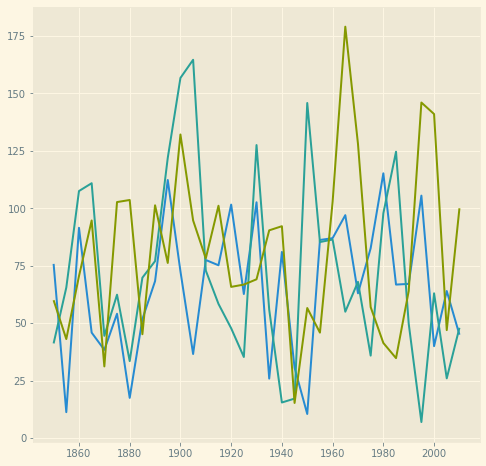

In [22]:
# Print our new plot
plt.plot(newDF.index,newDF.Jan)
plt.plot(newDF.index,newDF.Aug)
plt.plot(newDF.index,newDF.Nov)

<BarContainer object of 33 artists>

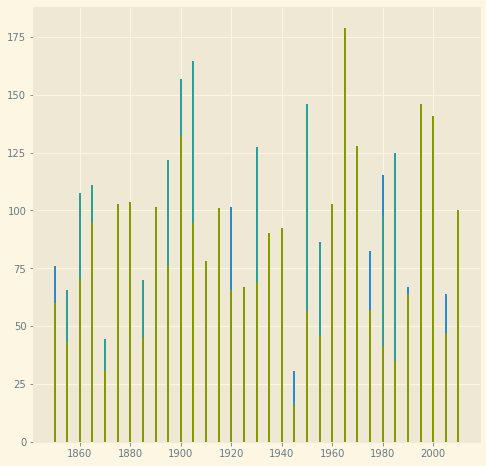

In [23]:
# Change to a bar plot
plt.bar(newDF.index,newDF.Jan)
plt.bar(newDF.index,newDF.Aug)
plt.bar(newDF.index,newDF.Nov)





## Hmmm...
Let us try to sort out this mess...

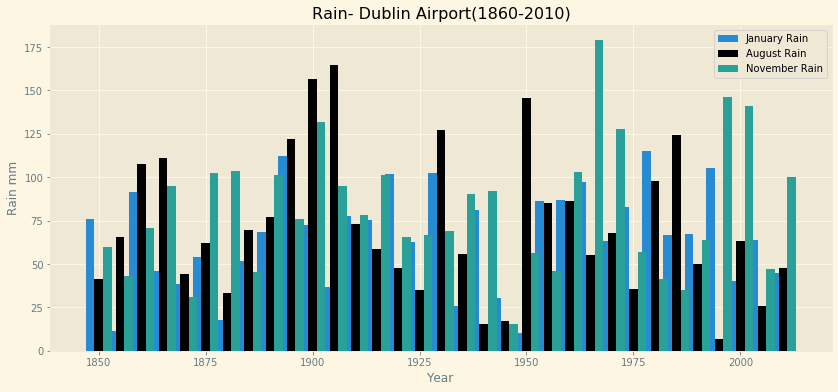

In [24]:
plt.style.use('Solarize_Light2')
plt.rcParams['figure.figsize'] = [14, 6]
width = 2.00
offset = 2.00

plt.bar(newDF.index - offset, newDF.Jan, width = width, label = 'January Rain')
plt.bar(newDF.index ,  newDF.Aug, width = width, color = 'k', label = 'August Rain')
plt.bar(newDF.index + offset, newDF.Nov, width = width, label = 'November Rain')


plt.title('Rain- Dublin Airport(1860-2010)')
plt.xlabel('Year')
plt.ylabel('Rain mm')
plt.grid(True)
plt.legend()

# Statistical Analysis

## Simple Stats

In [ ]:
# Mean and Median
print(df['Jan'].mean())

newDF['Jan'].mean()

In [ ]:
# Statistic on all of the dataframe
df.mean()

In [ ]:
# General Statistics
df.describe()

## Grouping Data
When grouping data it is a three phase process (carried out by Python). Split (into separate tables), apply a function (to each table), recombine( into one table).

In [ ]:
# load a new set of data for Killarney
kill_df = pd.read_csv("/Users/morgan/Documents/Courses/Python/MyModules/Killarney_1881-1933.csv")
kill_df

In [ ]:
#Get the shape of the dataframe
kill_df.shape

In [ ]:
year_group = kill_df.groupby(['Year'])

print(kill_df["Max (F)"])

In [ ]:
year_group.get_group(1933)

In [ ]:
# Same as filter 
filt = kill_df['Year']== 1932
kill_df.loc[filt]

In [ ]:
kill_df.loc[filt,['Min (C)']].min()

In [ ]:
#Get the lowest temp for each year from 1881
year_group['Min (C)'].max()

# Widgets

In [158]:
# The widgets library
import ipywidgets as widgets
from ipywidgets import interactive
from ipywidgets import interact

# Define a function
def my_function(x):
    return x**2

In [159]:
 #When you move the slider, the function is called, and its return value is printed.
interact(my_function, x=10);

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

In [161]:
#Another Widget
widgets.SelectionSlider(
    options = ['scrambled', 'sunny side up', 'poached', 'burnt'],
    value='sunny side up',
    description='I like my eggs ...',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)

SelectionSlider(continuous_update=False, description='I like my eggs ...', index=1, options=('scrambled', 'sun…

In [164]:
#Another Widget
widgets.IntSlider(
    min=0,
    max=10,
    step=2,
    description='Slider:',
    value=3
)

IntSlider(value=3, description='Slider:', max=10, step=2)

In [165]:
#Create a combo box/drop down
def say_my_name(name):
    """
    Print the current widget value in short sentence
    """
    print(f'My name is {name}')
     
widgets.interact(say_my_name, name=["Jim", "Emma", "Bond"]);


interactive(children=(Dropdown(description='name', options=('Jim', 'Emma', 'Bond'), value='Jim'), Output()), _…

## SAQ 2 - Daily Widget
Create a widget that gives a list of days and when a day is selected it returns the day of the week number.



In [166]:
#Add your answer here
# The widgets library
import ipywidgets as widgets
from ipywidgets import interactive
from ipywidgets import interact

def day_of_week(day):
    """
    Print the current widget value in short sentence
    """
    if day == "Mon":
        day_no = 1
    elif day == "Tue":
        day_no = 2
    else:
        day_no = 3    
    
    print(f'The day number is {day_no}')
     
widgets.interact(day_of_week, day=["Mon", "Tue", "Wed","Thu","Fri","Sat","Sun"]);



interactive(children=(Dropdown(description='day', options=('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'), v…

## Plotting with a widget

In [168]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('Solarize_Light2')
plt.rcParams['figure.figsize'] = [14, 7]

def my_function(m, c):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    #plt.plot(x, m * x  + c)
    plt.plot(x, m * x**2 + 3*x + c)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(my_function, m=(-2.0, 2.0), c=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '450px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

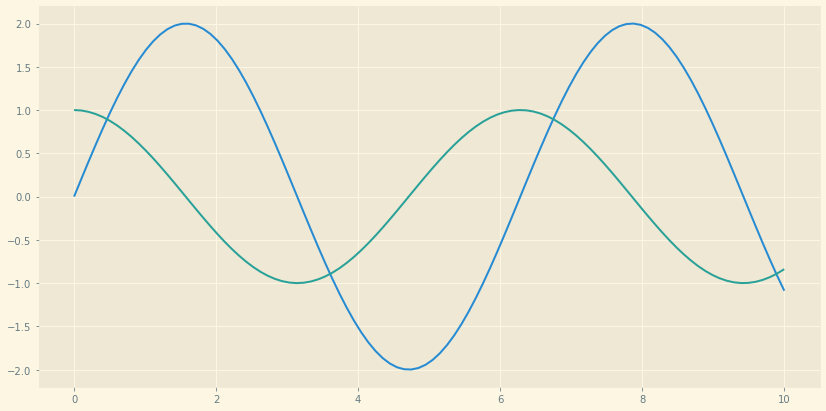

In [169]:
#
x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x)*2)
plt.plot(x, np.cos(x))

plt.show()

In [172]:
 y_values= list(np.around(np.arange(-2.0, 2.2, +0.2),2))

In [173]:
print( y_values)

[-2.0, -1.8, -1.6, -1.4, -1.2, -1.0, -0.8, -0.6, -0.4, -0.2, -0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]


In [177]:
# A Sine wave y= A*Sin(wt)
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive

# Get x values of the sine wave
time  = np.arange(0, 20, 0.1);

def my_sine(w, A):
# Amplitude of the sine wave is sine of a variable like time
    amplitude   = np.sin(w*time)*A
# Plot a sine wave using time and amplitude obtained for the sine wave
    plt.plot(time, amplitude)
# Give a title for the sine wave plot
    plt.title('Sine wave')
# Give x axis label for the sine wave plot
    plt.xlabel('Time')
    plt.yticks(( y_values))
# Give y axis label for the sine wave plot

    plt.ylabel('Amplitude = sin(time)')
    plt.grid(True, which='both')
    plt.axhline(y=0, color='k')
    plt.show()
# Display the sine wave
interactive_plot = interactive(my_sine, w=(1, 4), A=(0,2,0.2))
#output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=2, description='w', max=4, min=1), FloatSlider(value=1.0, description='A…

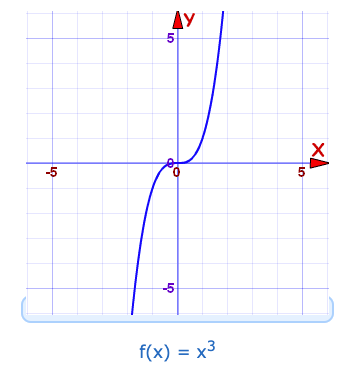

## SAQ3: Cubinism
Using widgets plot a graph of a x cubed + c

In [181]:
#Put your answer here
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('Solarize_Light2')
plt.rcParams['figure.figsize'] = [14, 7]

def my_function(m, c):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x**3 + c)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(my_function, m=(-2.0, 2.0), c=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '450px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

## EU Vaccine Data

In [5]:
import pandas as pd
import numpy as np
url = "https://opendata.ecdc.europa.eu/covid19/vaccine_tracker/csv/data.csv"
df_vac = pd.read_csv(url,index_col = 'ReportingCountry')
df_vac.columns

Index(['YearWeekISO', 'FirstDose', 'FirstDoseRefused', 'SecondDose',
       'UnknownDose', 'NumberDosesReceived', 'Region', 'Population',
       'TargetGroup', 'Vaccine', 'Denominator'],
      dtype='object')

In [6]:
df_vac

,YearWeekISO,FirstDose,FirstDoseRefused,SecondDose,UnknownDose,NumberDosesReceived,Region,Population,TargetGroup,Vaccine,Denominator
ReportingCountry,,,,,,,,,,,
AT,2020-W53,2644,0.0,0,0,61425.0,AT,8901064,1_Age60+,COM,2259262.0
AT,2020-W53,0,0.0,0,0,0.0,AT,8901064,1_Age60+,MOD,2259262.0
AT,2020-W53,0,0.0,0,0,0.0,AT,8901064,1_Age60+,AZ,2259262.0
AT,2020-W53,0,0.0,0,0,0.0,AT,8901064,1_Age<60,AZ,5099181.0
AT,2020-W53,2365,0.0,0,0,61425.0,AT,8901064,1_Age<60,COM,5099181.0
...,...,...,...,...,...,...,...,...,...,...,...
SK,2021-W13,9329,NaN,1696,0,0.0,SK,5457873,ALL,MOD,4437897.0
SK,2021-W13,28376,NaN,56,0,0.0,SK,5457873,ALL,AZ,4437897.0
SK,2021-W14,2005,NaN,1,0,0.0,SK,5457873,ALL,AZ,4437897.0


In [7]:
vac_rec = df_vac.groupby("ReportingCountry")["NumberDosesReceived"].sum()

In [8]:
vac_rec

ReportingCountry
AT    20628405.0
BE     2617845.0
BG      914040.0
CY      269485.0
CZ     2289580.0
DE    19695375.0
DK     1507520.0
EE      371520.0
EL    29886390.0
ES    11917275.0
FI     1362075.0
FR    15746645.0
HR      793680.0
HU     4779785.0
IE     1187100.0
IS      757800.0
IT    14344980.0
LI        9600.0
LT     1739610.0
LU      159120.0
LV      231660.0
MT           0.0
NL     4524820.0
NO     1141125.0
PL     8077660.0
PT     2612460.0
RO     4558060.0
SE     2856155.0
SI      476280.0
SK     1107750.0
Name: NumberDosesReceived, dtype: float64

In [9]:
# Import Widgets
import ipywidgets as widgets
from ipywidgets import interactive
from ipywidgets import interact

# Get a list of unique countries
country_list = list(df_vac.index.unique())

#print(country_list)
def filter_by_country(country):
    filt = df_vac.index == country
    new_df_vac =df_vac.loc[filt,['NumberDosesReceived','Vaccine']] 
    return new_df_vac
    

In [13]:

widgets.interact(filter_by_country, country = country_list);

#filter_by_country(country)

interactive(children=(Dropdown(description='country', options=('AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE',…

In [14]:
df_vac

,YearWeekISO,FirstDose,FirstDoseRefused,SecondDose,UnknownDose,NumberDosesReceived,Region,Population,TargetGroup,Vaccine,Denominator
ReportingCountry,,,,,,,,,,,
AT,2020-W53,2644,0.0,0,0,61425.0,AT,8901064,1_Age60+,COM,2259262.0
AT,2020-W53,0,0.0,0,0,0.0,AT,8901064,1_Age60+,MOD,2259262.0
AT,2020-W53,0,0.0,0,0,0.0,AT,8901064,1_Age60+,AZ,2259262.0
AT,2020-W53,0,0.0,0,0,0.0,AT,8901064,1_Age<60,AZ,5099181.0
AT,2020-W53,2365,0.0,0,0,61425.0,AT,8901064,1_Age<60,COM,5099181.0
...,...,...,...,...,...,...,...,...,...,...,...
SK,2021-W13,9329,NaN,1696,0,0.0,SK,5457873,ALL,MOD,4437897.0
SK,2021-W13,28376,NaN,56,0,0.0,SK,5457873,ALL,AZ,4437897.0
SK,2021-W14,2005,NaN,1,0,0.0,SK,5457873,ALL,AZ,4437897.0


In [15]:
vac_rec_IE = new_df_vac.groupby(['ReportingCountry','Vaccine'])["NumberDosesReceived"].sum()

NameError: name 'new_df_vac' is not defined

In [16]:
vac_rec_IE

NameError: name 'vac_rec_IE' is not defined

In [17]:
vac_rec = df_vac.groupby(['ReportingCountry','Vaccine'])["NumberDosesReceived"].sum()

In [196]:
vac_rec.head(50)

ReportingCountry  Vaccine
AT                AZ          5464800.0
                  COM        11061765.0
                  MOD         1771200.0
BE                AZ           530400.0
                  COM         1393275.0
                  MOD          254400.0
BG                AZ           463200.0
                  COM          341640.0
                  MOD          109200.0
                  UNK               0.0
CY                AZ            71900.0
                  COM          119325.0
                  MOD           18000.0
CZ                AZ           264800.0
                  COM         1497600.0
                  MOD          236400.0
DE                AZ          5577600.0
                  COM        12356175.0
                  MOD         1761600.0
DK                AZ           202920.0
                  COM          993740.0
                  MOD           79380.0
                  UNK               0.0
EE                AZ           136800.0
              

In [198]:
#Interaactive filter by Country
def filter_by_country(country):
    filt = df_vac.index == country
    new_df_vac =df_vac.loc[filt,['NumberDosesReceived','Vaccine']] 
    return new_df_vac

In [200]:
new_df_vac.head(55)

,NumberDosesReceived,Vaccine
ReportingCountry,,
IE,9750.0,COM
IE,31200.0,COM
IE,NaN,COM
IE,NaN,COM
IE,NaN,COM
IE,NaN,COM
IE,NaN,COM
IE,NaN,COM
IE,NaN,COM


## SAQ 4: Slippery Question!
Inport the data for Dublin Airport and plot the December Rainfall from 1951 to 1981 in 5 year intervals

In [ ]:
# load a new set of data for Blaksod
black_df # No need for a directory path if in the same directory, index_col = 'Year'
df = pd.read_csv("/Users/morgan/Documents/Courses/Python/MyModules/DublinAirportClean.csv",index_col = 'Year')

**Phew!** <div>
<img src="images/the_end.png" alt="The End" width="300" align="center"/></div>